# Spatial autocorrelation 
* Guides with codes on https://geographicdata.science/book/notebooks/06_spatial_autocorrelation.html
* Here we use data aggregated by CDUID
    * /dataset/canada-census-division/CD-download-data.shp


In [71]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas --quiet
import os
import pandas as pd
import pickle
import geopandas as gpd

os.system('cls')

os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1HoiIO5rDk02yAPQn_FwLi0Ry7lo64zYp/dataset


Here we perform spatial autocorrelation using the aggregated data.

In [80]:
# Load data
dat_path = './canada-census-division/CD-download-data.shp'
dat = gpd.read_file(dat_path)
print(dat.shape)
print(dat.columns)
dat.head(5)

(293, 20)
Index(['CDUID', 'CDNAME', 'CDTYPE', 'PRUID', 'PRNAME', '2019-Q1', '2019-Q2',
       '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4',
       '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', 'tests', 'DA_POP',
       'geometry'],
      dtype='object')


,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,tests,DA_POP,geometry
0,4621,Division No. 21,CDR,46,Manitoba,10.969708,11.504049,12.178585,11.598048,31.078093,17.680161,32.997536,39.577115,36.638628,68.453336,62.776182,95.403728,9685,1053890.0,"POLYGON ((5753862.131 2114062.380, 5752944.009..."
1,4622,Division No. 22,CDR,46,Manitoba,42.902977,31.102748,31.654955,63.713872,22.245280,25.696649,30.131834,37.165333,66.576610,86.906071,102.148346,97.025587,4389,1096785.0,"POLYGON ((6204057.683 2107140.734, 6204737.266..."
2,4623,Division No. 23,CDR,46,Manitoba,7.367737,8.154834,10.676788,10.329840,18.924137,11.283153,59.781785,69.834849,59.428820,77.856268,93.372450,97.945121,3235,266635.0,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
3,4701,Division No. 1,CDR,47,Saskatchewan,14.791119,14.680140,19.249345,23.091277,21.493342,18.430462,16.796906,21.772634,22.333091,49.550688,79.115720,67.320231,17296,1741640.0,"POLYGON ((5422081.934 1612417.386, 5422521.154..."
4,4702,Division No. 2,CDR,47,Saskatchewan,16.695685,20.033315,21.169976,23.188939,23.552589,21.423277,24.913625,23.100039,21.547493,31.417196,51.642854,50.141588,11089,1076270.0,"POLYGON ((5270212.334 1641442.671, 5270216.591..."


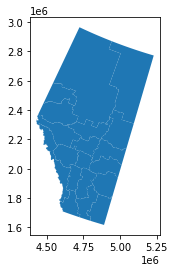

In [85]:
dat[dat['PRNAME']=='Alberta'].plot()